# G0W0 approximation

In this note, we explore some properties of the G0W0 approximation

## 1. RPA interaction
$$
W_0=\frac{v_q}{1-v_q\Pi_0},
$$
where $v_q$ is the Coulomb interaction, and $\Pi_0$ is the polarization of free electrons.

In [1]:
using ElectronGas
using GreenFunc
using LaTeXStrings
using Plots, Parameters

In [2]:
beta = 1000.0
rs = 1.0
d = 2
para=Parameter.rydbergUnit(1/beta, rs, d);

In [4]:
Nk, order, minK, rtol = 8, 8, 1e-7, 1e-10
sigma_dyn, sigma_ins = SelfEnergy.G0W0(para, 100*para.EF, rtol, Nk, 10 * para.kF, minK * para.kF, order, :rpa)
sigma_ωn = sigma_dyn |> to_dlr |> to_imfreq;
wgrid, kgrid = sigma_ωn.mesh
dlr = wgrid.representation
ωn_grid = wgrid.representation.ωn;
kFidx = searchsortedfirst(kgrid.grid, para.kF);

### 1.1 Frequency-dependent Self-energy (dynamic part only)

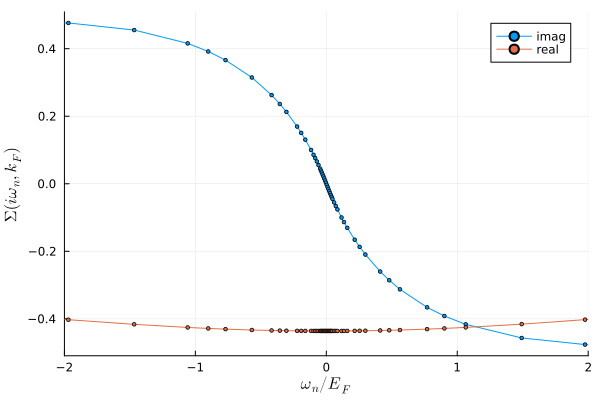

In [5]:
plot(ωn_grid/para.EF, imag(sigma_ωn[:, kFidx]),marker=2, label="imag", xlabel=L"$\omega_n/E_F$", ylabel=L"$\Sigma(i\omega_n, k_F)$", xlims=(-2, 2))
plot!(ωn_grid/para.EF, real(sigma_ωn[:, kFidx]),marker=2, label="real")

### 1.2 Momentum-dependent Self-energy (instant + dynamic)

47
-1.8006326323142126, -1.800623250593426 - 3.1140629700555206e-7im
-1.8006326323142126, -1.800623250593426 - 3.1140629700555206e-7im


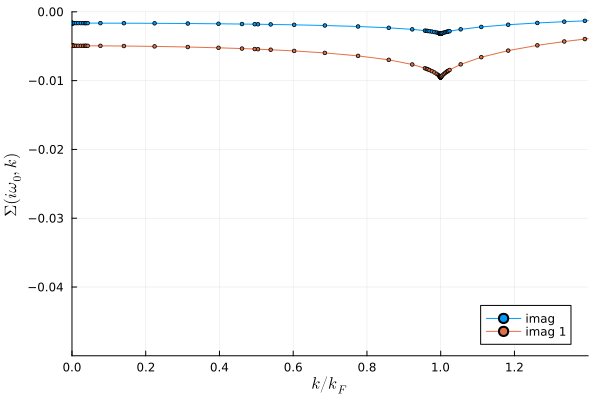

In [10]:
w0_idx = searchsortedfirst(dlr.n, 0)
println(w0_idx)

sig = sigma_ωn[w0_idx, :] .+ sigma_ins[1, :]
println("$(-para.kF*2*para.e0^2/π), $(sigma_ins[1, kFidx])")
plot(kgrid.grid/para.kF, imag(sigma_ωn[w0_idx, :]), xlim=(0.0,1.4), ylim=(-0.05,0.0),marker=2, label="imag", xlabel=L"$k/k_F$", ylabel=L"$\Sigma(i\omega_0, k)$")
#plot!(kgrid.grid/para.kF, real(sig), marker=2, label="real")

sig = sigma_ωn[w0_idx+1, :] .+ sigma_ins[1, :]
println("$(-para.kF*2*para.e0^2/π), $(sigma_ins[1, kFidx])")
plot!(kgrid.grid/para.kF, imag(sig), xlim=(0.0,1.4), ylim=(-0.05,0.0),marker=2, label="imag 1", xlabel=L"$k/k_F$", ylabel=L"$\Sigma(i\omega_0, k)$")
#plot!(kgrid.grid/para.kF, real(sig), marker=2, label="real 1")

### 1.3 Z-factor and Effective mass

Quasiparticle effective mass can be extracted from the quasiparticle propagator,
$$G(k, i\omega)=\frac{-1}{i\omega-k^2/{2m}+\mu+\Sigma(k, i\omega)}$$
Near the Fermi surface, 
$$Re\Sigma(k, i\omega)=Re\Sigma(k_F, 0)+\frac{\partial Re\Sigma(k_F, 0)}{\partial k} (k-k_F) + ...$$
and,
$$Im\Sigma(k, i\omega)=Im\Sigma(k_F, 0^+)\cdot \text{sgn}(\omega)+\frac{\partial Im\Sigma(k_F, 0^+)}{\partial \omega}\cdot \omega  + ...$$
so that the quasiparticle propagator is renormalized to the form,
$$G(k, i\omega) = \frac{-z}{i\omega-v_F^*(k-k_F)+i\eta \cdot \text{sgn}(\omega)}$$
the wave-function renormalization factor,
$$z=\frac{1}{1+\frac{\partial Im\Sigma(k_F, 0^+)}{\partial \omega}}=\lim_{T\rightarrow 0} \frac{1}{1+\frac{\Sigma(i\omega_2, k_F)-\Sigma(i\omega_1, k_F)}{i2\pi T}}$$
and the quasiparticle life time,
$$\eta = z\cdot Im\Sigma(k_F, 0^+)$$
and the effective mass,
$$\frac{m}{m^*}=z \cdot \left(1-\frac{m}{k_F}\frac{\partial Re\Sigma(k_F, 0)}{\partial k}\right)$$

rs = 1 has Z factor = 0.6626560199207896


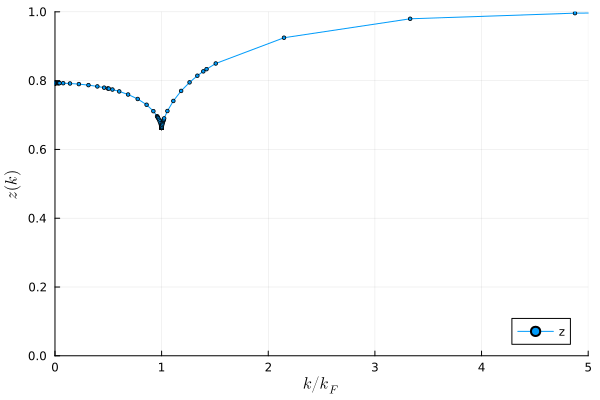

In [12]:
w0idx = searchsortedfirst(dlr.n, 0)
zfactor_wn = @. 1 / (1 - imag(sigma_ωn[w0idx, :]) / π * para.β)
zfactor = zfactor_wn[kFidx]
println("rs = 1 has Z factor = ", zfactor)
plot(kgrid.grid/para.kF, zfactor_wn, marker=2, label="z", xlim=(0.0,5), ylim=(0,1), xlabel=L"$k/k_F$", ylabel=L"$z(k)$")

┌ Warning: Some of the DLR coefficients are larger than 1e16. The quality of DLR fitting could be bad.
└ @ Lehmann /home/pchou/.julia/packages/Lehmann/v7X4o/src/operation.jl:370


rs = 0.2 => 0.9028683441788833, with m*/m = 0.9609560793209351


┌ Warning: Some of the DLR coefficients are larger than 1e16. The quality of DLR fitting could be bad.
└ @ Lehmann /home/pchou/.julia/packages/Lehmann/v7X4o/src/operation.jl:370


rs = 0.5 => 0.7900843413960532, with m*/m = 0.9787571664643179


┌ Warning: Some of the DLR coefficients are larger than 1e16. The quality of DLR fitting could be bad.
└ @ Lehmann /home/pchou/.julia/packages/Lehmann/v7X4o/src/operation.jl:370


rs = 1.0 => 0.6643687873415336, with m*/m = 1.017292990475346


┌ Warning: Some of the DLR coefficients are larger than 1e16. The quality of DLR fitting could be bad.
└ @ Lehmann /home/pchou/.julia/packages/Lehmann/v7X4o/src/operation.jl:370


rs = 2.0 => 0.5208104758965416, with m*/m = 1.0749628398119586
rs = 4.0 => 0.3843177909438255, with m*/m = 1.1359383943785075
rs = 8.0 => 0.2714457809043789, with m*/m = 1.1822363450282063
rs = 16.0 => 0.18612520476305494, with m*/m = 1.201943904431772


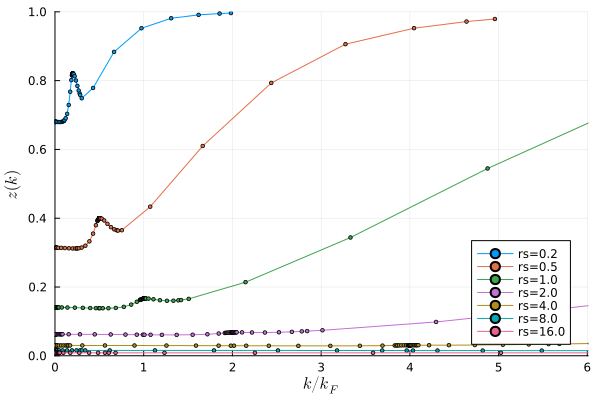

In [13]:
zfactor = []
mass = []
zfactor_n = []
rslist = [0.2, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0]
plt =plot(xlims=(0.0, 6.01), ylims=(0.0, 1.0), legend = :bottomright)
for _rs in rslist
    param = Parameter.rydbergUnit(1.0/beta/2, _rs, d)
    @unpack me, β, kF = param
    Nk, order, minK, rtol = 8, 8, 1e-7, 1e-10
    sigma_dyn, sigma_ins = SelfEnergy.G0W0(param, minK = minK, Nk=Nk, order=order);
    sigma_wn = sigma_dyn |> to_dlr |> to_imfreq;

    z, _ = SelfEnergy.zfactor(param, sigma_wn)
    mratio, _ = SelfEnergy.massratio(param, sigma_dyn, sigma_ins)

    println("rs = $_rs => $z, with m*/m = $mratio")
    push!(zfactor, z)
    push!(mass, mratio)
    
    
    zfactor_wn = @. 1 / (1 - imag(sigma_wn[w0idx+1, :]-sigma_wn[w0idx, :]) / (2π) * param.β)
    push!(zfactor_n, zfactor_wn)
    plot!(plt, kgrid.grid/param.kF, zfactor_wn, marker=2, label="rs=$_rs", xlabel=L"$k/k_F$", ylabel=L"$z(k)$")
end
savefig(plt, "G0W0_z_2d.pdf")
display(plt)